In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# 14.1 in the slides; doesn't need to be here

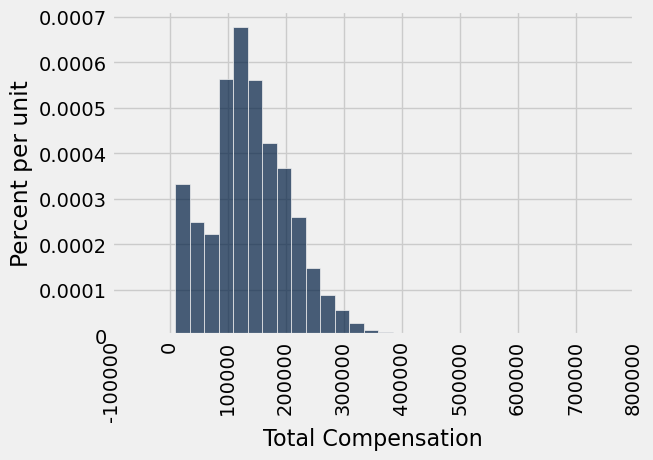

In [4]:
sf = Table.read_table('data/san_francisco_2019.csv').where('Salary', are.above(10000))
sf.select('Total Compensation').hist(bins = np.arange(10000, 700000, 25000))

In [6]:
compensation = sf.column('Total Compensation')
percentile(50, compensation)

133424.0

In [7]:
np.average(compensation), np.mean(compensation)

(138635.81391404191, 138635.81391404191)

In [10]:
nums = make_array(1, 2, 4, 42)
mean = np.mean(nums)
mean

12.25

In [12]:
deviations = nums - mean
calculation_steps = Table().with_columns(
        'Value', nums,
        'Deviation from Average', deviations
        )
calculation_steps

Value,Deviation from Average
1,-11.25
2,-10.25
4,-8.25
42,29.75


In [13]:
sum(deviations)

0.0

In [14]:
np.mean(deviations)

0.0

In [15]:
squared_deviations = deviations**2
calculation_steps = calculation_steps.with_column(
   'Squared Deviations from Average', squared_deviations
    )
calculation_steps

Value,Deviation from Average,Squared Deviations from Average
1,-11.25,126.562
2,-10.25,105.062
4,-8.25,68.0625
42,29.75,885.062


In [16]:
variance = np.mean(squared_deviations)
variance

296.1875

In [17]:
sd = variance**0.5
sd

17.210098779495716

In [18]:
np.std(nums)

17.210098779495716

In [29]:
heights = Table.read_table('data/sons_heights.csv')
heights

father,mother,son
78.5,67,73.2
75.5,66.5,73.5
75,64,71
75,64,70.5
75,58.5,72
74,68,76.5
74,62,74
73,67,71
73,67,68
73,66.5,71


In [30]:
mean_height = np.mean(heights.column(2))
mean_height

70.454748603351959

In [31]:
sd_height = np.std(heights.column(2))
sd_height

2.5499079441014936

In [32]:
heights.select('son').sort(0)

son
63
64
64
64.5
65
65
66
66
66
66


In [34]:
(63 - mean_height) / sd_height

-2.9235363655368252

In [33]:
heights.select('son').sort(0, descending=True)

son
79
78
76.5
76
75
75
75
74.2
74
74


In [35]:
(79 - mean_height) / sd_height

3.3511999585769812

In [36]:
def standard_units(numbers_array):
    return (numbers_array - np.mean(numbers_array))/np.std(numbers_array) 

In [38]:
heights = heights.with_column(
    'son (standard units)', standard_units(heights.column('son'))
)
heights

father,mother,son,son (standard units)
78.5,67,73.2,1.07661
75.5,66.5,73.5,1.19426
75,64,71,0.213832
75,64,70.5,0.0177463
75,58.5,72,0.606003
74,68,76.5,2.37077
74,62,74,1.39034
73,67,71,0.213832
73,67,68,-0.962681
73,66.5,71,0.213832


In [40]:
within_3_sd = heights.where('son (standard units)', are.between(-3, 3))
within_3_sd.num_rows / heights.num_rows

0.994413407821229

---

In [42]:
from scipy import stats

In [43]:
stats.norm.cdf(1)

0.84134474606854293

In [44]:
1 - stats.norm.cdf(1)

0.15865525393145707

In [45]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.68268949213708585

In [46]:
# do the rest of 14.3 in the slides and crushed ice

---

In [52]:
die = Table().with_column('value', make_array(1,2,3,4,5,6))
die

value
1
2
3
4
5
6


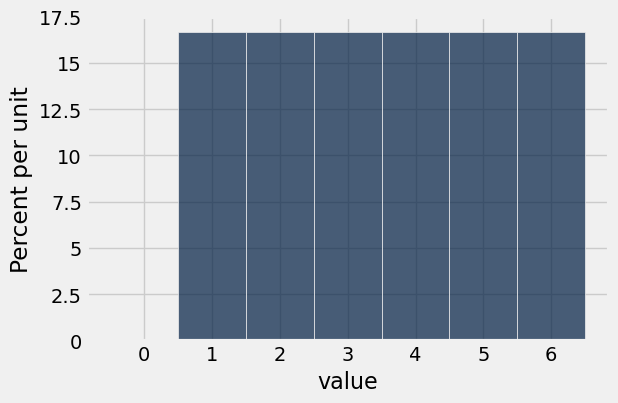

In [56]:
die.hist(bins=np.arange(-0.5, 6.6, 1))

In [78]:
def average_die_value(sample_size):
    sample = die.sample(sample_size)
    return np.mean(sample.column(0))

average_die_value(1000)

3.4449999999999998

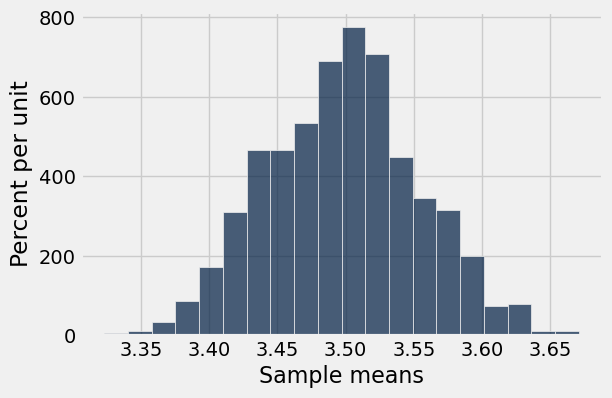

In [81]:
# let's roll 1000 dice 1000 times
group_averages = make_array()

for i in np.arange(1000):
    group_average = average_die_value(1000)
    group_averages = np.append(group_averages, group_average)

Table().with_columns('Sample means', group_averages).hist(bins=20)

In [82]:
population_sd = np.std(die.column(0))
population_sd    

1.707825127659933

In [87]:
def sample_mean_statistics(sample_size, repetitions):
    group_averages = make_array()

    for i in np.arange(repetitions):
        group_average = average_die_value(sample_size)
        group_averages = np.append(group_averages, group_average)

    print('Sample size:', sample_size)
    print('SD of sample means', np.std(group_averages))
    Table().with_columns('Sample means', group_averages).hist(bins=20)

Sample size: 10
SD of sample means 0.538738346881


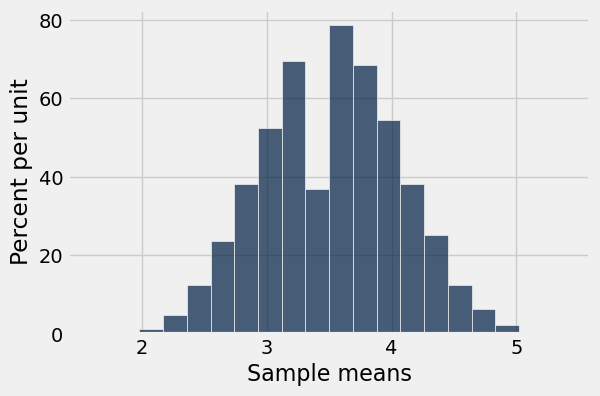

In [88]:
sample_mean_statistics(10, 10000)

Sample size: 100
SD of sample means 0.170477966785


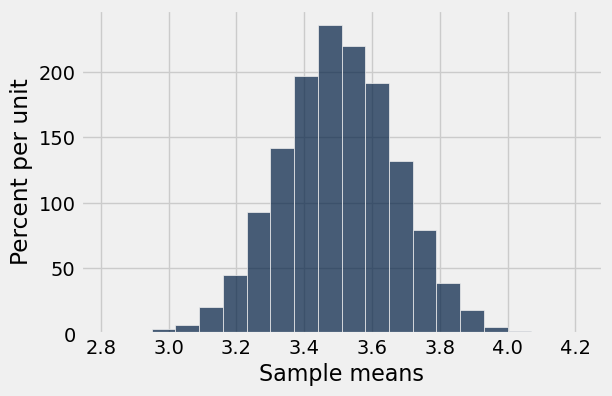

In [89]:
sample_mean_statistics(100, 10000)

Sample size: 1000
SD of sample means 0.0535424109222


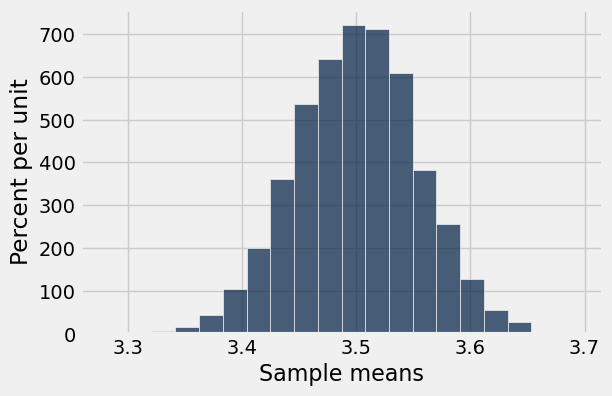

In [90]:
sample_mean_statistics(1000, 10000)

In [91]:
sizes = make_array(10, 100, 1000)
for size in sizes:
    print(size, ':', population_sd / size**0.5)

10 : 0.540061724867
100 : 0.170782512766
1000 : 0.0540061724867


In [92]:
# formulats for 14.5 in the slides

In [93]:
sd = make_array()
for i in np.arange(1, 10, 1):
    # Create an array of i 1's and (10-i) 0's
    population = np.append(np.ones(i), 1-np.ones(10-i))
    sd = np.append(sd, np.std(population))
    
zero_one_sds = Table().with_columns(
    "Population Proportion of 1's", np.arange(0.1, 1, 0.1),
    "Population SD", sd
)

zero_one_sds

Population Proportion of 1's,Population SD
0.1,0.3
0.2,0.4
0.3,0.458258
0.4,0.489898
0.5,0.5
0.6,0.489898
0.7,0.458258
0.8,0.4
0.9,0.3


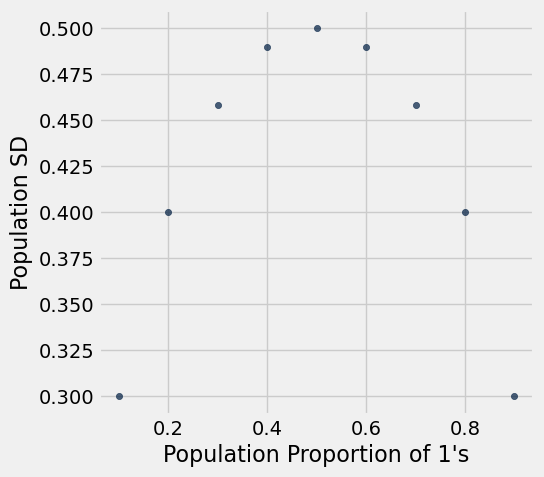

In [94]:
zero_one_sds.scatter("Population Proportion of 1's")

In [95]:
# formulas for 14.6 in the slides